# Multivariable Linear Regression

In [1]:
%pylab inline
#import sklearn.preprocessing as pre
import doctest

Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
data = np.loadtxt('ex1data2.txt',delimiter=',')
X = data[:,:-1]
y = data[:,-1].reshape((-1,1))

## Normalize features

In [3]:
def normalize_features(X, mu=None, sigma=None):
    """Apply Standardization method to an unbiased array of features.
    
    The features will be rescaled so that they’ll have the properties
    of a standard normal distribution with mean=0 and std=1.
    
    Parameters
    ----------
    X : array_like
        Input array.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``
        before standardization.
    mu : array_like, optional
        The mean to be used in the Standardization algorithm.
        If `mu` is not provided, it will be computed as the mean of `X`.
    sigma : array_like, optional
        The standard deviation to be used in the Standardization algorithm.
        If `sigma` is not provided, it will be computed as the standard
        deviation of `X`.
        
    Returns
    -------
    z : numpy.ndarray
        The standard scores (z-scores) of the features
        as an array of `numpy.float64`.
    mu : numpy.ndarray
        The features means used in Standardization algorithm
        as an array of `numpy.float64`.
    sigma : numpy.ndarray
        The features standard deviations used in the Standardization algorithm
        as an array of `numpy.float64`.
        
    Examples
    --------
    >>> x = [[2, 3],[4, 5],[6, 7]]
    >>> print(normalize_features(x))
    (array([[-1.22474487, -1.22474487],
           [ 0.        ,  0.        ],
           [ 1.22474487,  1.22474487]]), array([4., 5.]), array([1.63299316, 1.63299316]))
    
    >>> mu = [4., 5.]
    >>> sigma = [1.63299316, 1.63299316]
    >>> print(normalize_features(x,mu,sigma))
    (array([[-1.22474487, -1.22474487],
           [ 0.        ,  0.        ],
           [ 1.22474487,  1.22474487]]), array([4., 5.]), array([1.63299316, 1.63299316]))
    """
    if np.ndim(X) == 1:
        X = np.reshape(X, (-1,1))
        
    mu = np.mean(X, axis=0) if mu is None else np.array(mu)
    sigma = np.std(X, axis=0) if sigma is None else np.array(sigma)
    Z = (np.array(X) - mu) / sigma
    return Z, mu, sigma

## Insert Bias Feature

In [4]:
def insert_bias_feature(X):
    """Insert a column filled with ones in front of an unbiased array of features.
    
    The new column is inserted at index ``0`` on axis ``1``.
    
    Parameters
    ----------
    X : array_like
        Input array.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``
        before the new column insertion.
        
    Returns
    -------
    numpy.ndarray
        Output array.
        If `X` has ``(m,n)`` shape, the return value will have ``(m,n+1)``shape.
        
    Examples
    --------
    >>> x = np.array([[2,3],[4,5],[6,7]])
    >>> insert_bias_feature(x)
    array([[1, 2, 3],
           [1, 4, 5],
           [1, 6, 7]])
     
    >>> x = np.array([[2],[3],[4]])
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
     
    >>> x = [2,3,4]
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
    """
    if np.ndim(X) == 1:
        X = np.reshape(X, (-1,1))
        
    return np.insert(X,0,1,axis=1)

## Initialize Theta

In [5]:
def initialize_theta(shape, order='C'):
    """Return a new array of given shape, filled with `numpy.float64` zeros.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    order : {'C', 'F'}, optional
        Whether to store multidimensional data in C- or Fortran-contiguous
        (row- or column-wise) order in memory.
        
    Returns
    -------
    numpy.ndarray
        Array of `numpy.float64` zeros with the given shape and order.
    
    Examples
    --------
    >>> initialize_theta(5)
    array([0., 0., 0., 0., 0.])
    
    >>> initialize_theta((5,))
    array([0., 0., 0., 0., 0.])
    
    >>> initialize_theta((2, 1))
    array([[0.],
           [0.]])
    
    >>> initialize_theta((2,2))
    array([[0., 0.],
           [0., 0.]])
    """
    return np.zeros(shape)

## Cost Function

In [6]:
def linear_loss(theta,X,y):
    """Compute linear regression cost from unbiased examples.
    
    The cost is the result of the Mean Squared Error computation.

    Parameters
    ----------
    theta : array_like
        Parameters (weights) of the model, including the bias parameter.
        If `theta` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)```.
        
    Returns
    -------
    J : numpy.float64
        Cost value.
    
    Examples
    --------
    >>> t = [[0],[0]]
    >>> x = [[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]]
    >>> y = [[17.592], [9.1302], [13.662], [11.854], [6.8233]]
    >>> linear_loss(t,x,y)
    76.656399893
    
    >>> t = [0,0]
    >>> x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598]
    >>> y = [17.592, 9.1302, 13.662, 11.854, 6.8233]
    >>> linear_loss(t,x,y)
    76.656399893
    """
    if np.ndim(theta) == 1:
        theta = np.reshape(theta,(-1,1))
    if np.ndim(y) == 1:
        y = np.reshape(y, (-1,1))
        
    X_biased = insert_bias_feature(X)
    z = X_biased @ theta
    J = np.sum(np.square(z - y)) / (2*len(y))
    return J

## Gradient Descent

In [7]:
def linear_gradient_descent(X,y,alpha,iterations):
    """Minimize linear loss from unbiased examples using gradient descent method.
    
    Parameters
    ----------
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    alpha: float
        The learning rate.
        Usually choosen from: ``[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]``.
    iterations: int
        The number of iterations of the gradient descent algorithm.
        
    Returns
    -------
    theta : numpy.ndarray
        The model's parameters (weights).
    costs : numpy.ndarray
        An array of cost values per iteration.
    
    Examples
    --------
    >>> x = [[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]]
    >>> y = [[17.592], [9.1302], [13.662], [11.854], [6.8233]]
    >>> a = 0.01
    >>> i = 3
    >>> print(linear_gradient_descent(x,y,a,i))
    (array([[0.21793241],
           [1.45965607]]), array([26.87250936, 12.21653968,  7.90190872]))
    
    >>> x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598]
    >>> y = [17.592, 9.1302, 13.662, 11.854, 6.8233]
    >>> linear_gradient_descent(x,y,a,i)
    (array([[0.21793241],
           [1.45965607]]), array([26.87250936, 12.21653968,  7.90190872]))
    """
    if np.ndim(y) == 1:
        y = np.reshape(y, (-1,1))
        
    X_biased = insert_bias_feature(X)
    m, n = X_biased.shape
    theta = initialize_theta((n,1))
    costs = np.zeros(iterations)
    for i in range(iterations):
        z = X_biased @ theta
        D = X_biased.T @ (z - y) / len(y)
        theta -= alpha * D
        costs[i] = linear_loss(theta,X,y)
    return theta, costs

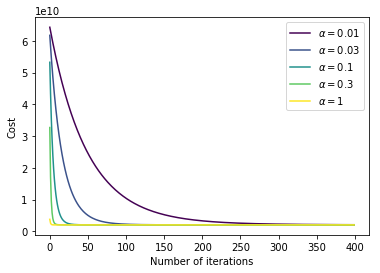

In [8]:
def plot_gradient_descent(X,y,alphas,iterations):
    X_norm, mu, sigma = normalize_features(X)
    colors = plt.cm.viridis(np.linspace(0,1,len(alphas)))
    for i, alpha in enumerate(alphas):
        theta, costs = linear_gradient_descent(X_norm,y,alpha,iterations)
        plt.plot(costs,'-g',label=rf'$\alpha = {alpha}$',color=colors[i]);
        
    plt.legend();
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost');
    
plot_gradient_descent(X,y,alphas=[0.01,0.03,0.1,0.3,1],iterations=400)

## Predict with Gradient Descent

In [9]:
def make_predictions(X,y,xs):
    X_norm, mu, sigma = normalize_features(X)
    theta, _ = linear_gradient_descent(X_norm,y,alpha=1,iterations=400)
    xs_norm, _, _ = normalize_features(xs, mu=mu, sigma=sigma)
    xs_biased = insert_bias_feature(xs_norm)
    ys = xs_biased @ theta
    print(f'The estimated price of a house with {xs[0,0]} square feet and {xs[0,1]} bedrooms is ${ys[0,0]:.2f}')
    
make_predictions(X,y,xs=np.array([[1650,3]]))

The estimated price of a house with 1650 square feet and 3 bedrooms is $293081.46


## Predict with Normal Equations

In [10]:
def normal_equations(X,y):
    """Solves the linear least squares for unbiased examples,
    using the derivation of the normal equations.
    
    Parameters
    ----------
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
        
    Returns
    -------
    theta : numpy.ndarray
        The model's parameters (weights).
    
    Examples
    --------
    >>> x = [[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]]
    >>> y = [[17.592], [9.1302], [13.662], [11.854], [6.8233]]
    >>> normal_equations(x,y)
    array([[3.47007754],
           [1.26323047]])
    """
    X_biased = insert_bias_feature(X)
    theta = np.linalg.pinv(X_biased.T @ X_biased) @ X_biased.T @ y
    return theta

In [11]:
def make_predictions_with_normal_equations(X,y,xs):
    theta = normal_equations(X,y)
    xs_biased = insert_bias_feature(xs)
    ys = xs_biased @ theta
    print(f'The estimated price of a house with {xs[0,0]} square feet and {xs[0,1]} bedrooms is ${ys[0,0]:.2f}')
    
make_predictions_with_normal_equations(X,y,xs=np.array([[1650,3]]))

The estimated price of a house with 1650 square feet and 3 bedrooms is $293081.46


## Unit Tests

In [12]:
doctest.testmod()

TestResults(failed=0, attempted=34)

In [13]:
# set the file name (required)
__file__ = 'ex1_multi.ipynb'

# add ipython magics
import ipytest.magics
import pytest

In [15]:
%%run_pytest[clean] -qq -v

def test_insert_bias_feature():
    ipytest.assert_equals(insert_bias_feature([[2,3], [4,5], [6,7]]),
                          np.array([[1, 2, 3], [1, 4, 5], [1, 6, 7]]))
    ipytest.assert_equals(insert_bias_feature(np.array([[2],[3],[4]])),
                          np.array([[1, 2], [1, 3], [1, 4]]))
    ipytest.assert_equals(insert_bias_feature([2,3,4]),
                          np.array([[1, 2], [1, 3], [1, 4]]))

def test_initialize_theta():
    ipytest.assert_equals(initialize_theta(5), np.array([0., 0., 0., 0., 0.]))
    ipytest.assert_equals(initialize_theta((5,)), np.array([0., 0., 0., 0., 0.]))
    ipytest.assert_equals(initialize_theta((2, 1)), np.array([[0.], [0.]]))
    ipytest.assert_equals(initialize_theta((2,2)), np.array([[0., 0.], [0., 0.]]))
    
def test_linear_loss():
    ipytest.assert_equals(linear_loss(
        theta=[[0],[0]],
        X=[[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]],
        y=[[17.592], [9.1302], [13.662], [11.854], [6.8233]]), 76.656399893)
    ipytest.assert_equals(linear_loss(
        theta=[0,0],
        X=[6.1101, 5.5277, 8.5186, 7.0032, 5.8598],
        y=[17.592, 9.1302, 13.662, 11.854, 6.8233]), 76.656399893)

def test_normalize_features():
    a1 = np.array([[1,2,3],[4,3,2],[2,3,4],[3,2,1]])
    mu1 = np.array([2.5, 2.5, 2.5])
    sigma1 = np.array([1.11803399, 0.5, 1.11803399])
    a2 = np.array([[-1.34164079, -1., 0.4472136],
                [1.34164079, 1., -0.4472136],
                [-0.4472136, 1., 1.34164079],
                [0.4472136, -1., -1.34164079]])
    a3, mu2, sigma2 = normalize_features(a1)
    ipytest.assert_equals(a3, a2)
    ipytest.assert_equals(mu2, mu1)
    ipytest.assert_equals(sigma2, sigma1)
    
def test_normalize_features_with_parameters():
    a1 = np.array([[1,2,3],[4,3,2],[2,3,4],[3,2,1]])
    mu1 = np.array([2.5, 2.5, 2.5])
    sigma1 = np.array([1.11803399, 0.5, 1.11803399])
    a2 = np.array([[-1.34164079, -1., 0.4472136],
                [1.34164079, 1., -0.4472136],
                [-0.4472136, 1., 1.34164079],
                [0.4472136, -1., -1.34164079]])
    a3, mu2, sigma2 = normalize_features(a1, mu=mu1, sigma=sigma1)
    ipytest.assert_equals(a3, a2)
    ipytest.assert_equals(mu2, mu1)
    ipytest.assert_equals(sigma2, sigma1)
    
def test_linear_gradient_descent():
    theta, costs = linear_gradient_descent(
        X=[[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]],
        y=[[17.592], [9.1302], [13.662], [11.854], [6.8233]],
        alpha=0.01, iterations=5)
    ipytest.assert_equals(theta, np.array([[0.2484605],[1.65525105]]))
    ipytest.assert_equals(costs, np.array([26.87250936, 12.21653968, 7.90190872, 6.63167333, 6.25768018]))
    
    theta, costs = linear_gradient_descent(
        X=[6.1101, 5.5277, 8.5186, 7.0032, 5.8598],
        y=[17.592, 9.1302, 13.662, 11.854, 6.8233],
        alpha=0.01, iterations=5)
    ipytest.assert_equals(theta, np.array([[0.2484605],[1.65525105]]))
    ipytest.assert_equals(costs, np.array([26.87250936, 12.21653968, 7.90190872, 6.63167333, 6.25768018]))
    
def test_normal_equations():
    X = [[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]]
    y = [[17.592], [9.1302], [13.662], [11.854], [6.8233]]
    ipytest.assert_equals(normal_equations(X,y),
                         np.array([[3.47007754],[1.26323047]]))

.......                                                                                                                                                                                              [100%]
7 passed in 0.11 seconds
